In [19]:
# All imports we need go into the very first cell.
from fastai.data.block import DataBlock
from pathlib import Path
from fastai.vision.augment import Resize
from fastai.data.block import CategoryBlock
from fastai.data.transforms import RandomSplitter, get_image_files, parent_label
from fastai.vision.data import ImageBlock
from fastai.metrics import error_rate
from fastai.vision.learner import vision_learner
from torchvision.models import resnet34, resnet18
from fastai.callback.schedule import fine_tune
from fastai.vision.core import PILImage

In [20]:
# This loads the data set into FastAi's DataBlock class.  
# This also specifies things like 
#  * hold out percentage.  This is % of data to keep for validation purposes and not training - valid_pct
#  * How images are converted - simple resize to 256/256
#  * How labels are extracted - Simply look up folder name of an image.
path = Path('cancer_or_not')
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(256, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

ValueError: This DataLoader does not contain any batches

In [11]:
# This is where the magic happens. 
# We take a pretrained model and fine tune it.
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.605496,1.260873,0.444444,00:00


epoch,train_loss,valid_loss,error_rate,time
0,1.278036,1.028938,0.333333,00:00
1,1.080511,0.961177,0.333333,00:00
2,0.817406,0.801845,0.333333,00:00
3,0.653280,0.679497,0.333333,00:00
4,0.530187,0.610160,0.333333,00:01
5,0.439371,0.594323,0.333333,00:00
6,0.376625,0.578030,0.333333,00:00
7,0.327740,0.596849,0.333333,00:00
8,0.288509,0.596360,0.333333,00:01
9,0.257501,0.568986,0.333333,00:01


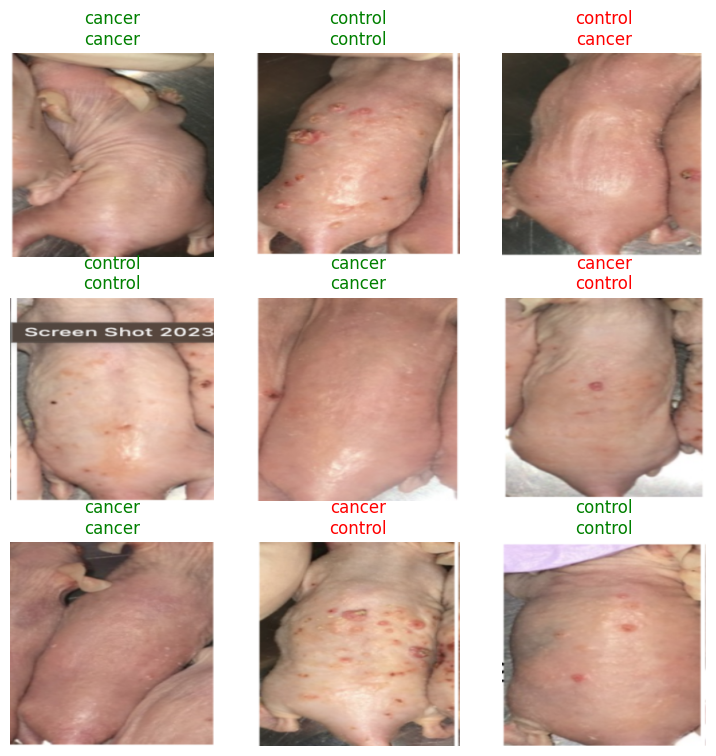

In [12]:
learn.show_results()

In [13]:
learn.predict(PILImage.create('test_set/healthy.png'))

('cancer', tensor(0), tensor([0.7174, 0.2826]))

In [14]:
learn.predict(PILImage.create('test_set/human.jpg'))

('cancer', tensor(0), tensor([0.7434, 0.2566]))

In [15]:
learn.predict(PILImage.create('test_set/pinky.png'))

('cancer', tensor(0), tensor([0.9212, 0.0788]))